In [13]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [14]:
df = pd.read_csv('consumer_complaints.csv')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
date_received                   555957 non-null object
product                         555957 non-null object
sub_product                     397635 non-null object
issue                           555957 non-null object
sub_issue                       212622 non-null object
consumer_complaint_narrative    66806 non-null object
company_public_response         85124 non-null object
company                         555957 non-null object
state                           551070 non-null object
zipcode                         551452 non-null object
tags                            77959 non-null object
consumer_consent_provided       123458 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null object
company_response_to_consumer    555957 non-null object
timely_response                 555957 non-null object
consumer_dis

In [15]:
df['company_response_to_consumer'].value_counts(dropna=False)

df['date_received'].max()
 
df['date_received'].min()
  
df['timely_response'].value_counts(dropna=False) 

Yes    541909
No      14048
Name: timely_response, dtype: int64

In [16]:
df['consumer_disputed?'].value_counts(dropna=False)

No     443823
Yes    112134
Name: consumer_disputed?, dtype: int64

In [17]:
company_complaitns_counts = df['company'].value_counts()
df['company_complaint_counts'] = df['company'].apply(lambda x: company_complaitns_counts[x])

company = pd.crosstab(df['company'], df['consumer_disputed?'])

In [18]:
company.head()

consumer_disputed?,No,Yes
company,,
"(Former)Shapiro, Swertfeger & Hasty, LLP",4,0
"1st 2nd Mortgage Company Of NJ, Inc.",1,0
1st Alliance Lending,11,2
"1st Capital Finance of South Carolina, Inc.",1,0
"1st Capital Mortgage, LLC",0,1


In [19]:
company['dispute_rate'] = company.Yes / (company.Yes + company.No)
company['company'] = company.index
company['complaint_counts'] = company['company'].apply(lambda x: company_complaitns_counts[x])
company = company.sort_values('complaint_counts', ascending=False)

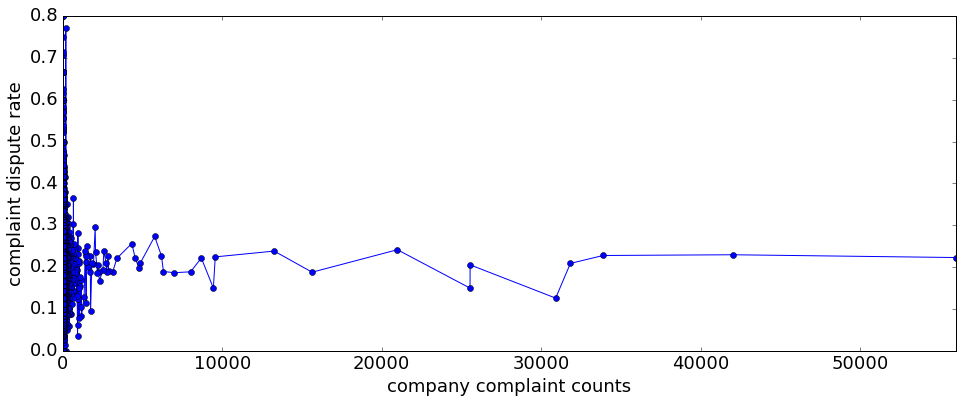

In [20]:
company
fig = plt.figure(figsize=(16,6))
plt.plot(company['complaint_counts'],company['dispute_rate'],marker='o')
plt.xlim([0.0, 56000])
plt.ylim([0.0, 0.8])
plt.xlabel('company complaint counts')
plt.ylabel('complaint dispute rate')
plt.title('')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 18})

plt.show()

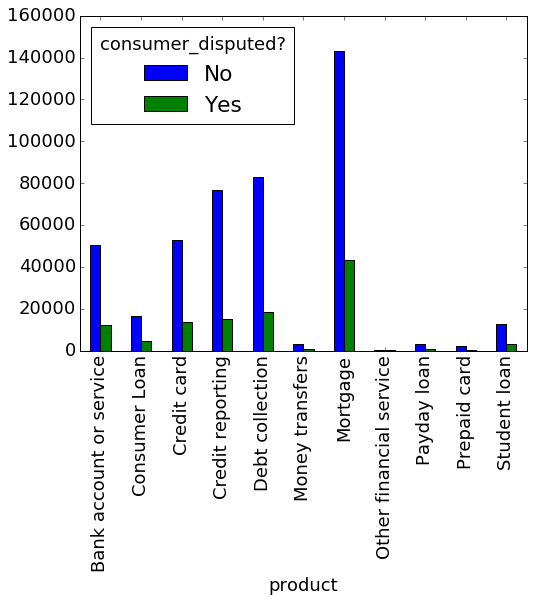

In [21]:
temp= pd.crosstab(df['product'], df['consumer_disputed?'])
temp.plot(kind='bar',figsize=(8,6))

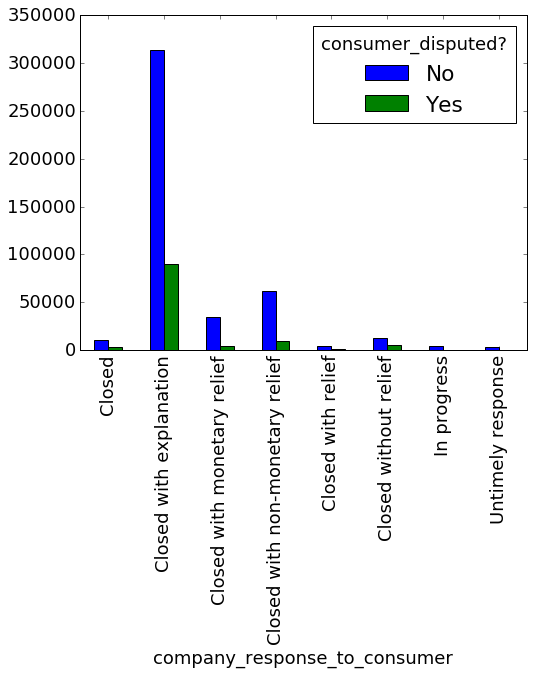

In [22]:
temp1= pd.crosstab(df['company_response_to_consumer'], df['consumer_disputed?'])
temp1.plot(kind='bar',figsize=(8,6))

In [23]:
df['state'].value_counts().shape

df['date_received']=pd.DatetimeIndex(df['date_received'],format='%m/%d/%Y').date
df['date_sent_to_company']=pd.DatetimeIndex(df['date_sent_to_company'],format='%m/%d/%Y').date
df[df['date_received']!=df['date_sent_to_company']].shape
####(321217, 19)

(321217, 19)

In [24]:
df[pd.isnull(df['issue'])]

df['sub_product'].fillna('Not Provided',inplace=True)
df.info()
df['sub_issue'].fillna('Not Provided',inplace=True)
df['consumer_complaint_narrative'].fillna('None or Not Provided',inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 19 columns):
date_received                   555957 non-null object
product                         555957 non-null object
sub_product                     555957 non-null object
issue                           555957 non-null object
sub_issue                       212622 non-null object
consumer_complaint_narrative    66806 non-null object
company_public_response         85124 non-null object
company                         555957 non-null object
state                           551070 non-null object
zipcode                         551452 non-null object
tags                            77959 non-null object
consumer_consent_provided       123458 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null object
company_response_to_consumer    555957 non-null object
timely_response                 555957 non-null object
consumer_dis

In [25]:
df['company_public_response'].fillna('Company chooses not to provide',inplace=True)

In [26]:
df['tags'].fillna('Unknown',inplace=True)

In [27]:
df['submitted_via'].fillna('Other',inplace=True)

In [28]:
df['consumer_consent_provided'].fillna('Consent not provided',inplace=True) 
df['consumer_consent_provided']=df['consumer_consent_provided'].apply(lambda x: 
            'Consent not provided' if x=='Other' or x=='Consent withdrawn' else x)
df['consumer_consent_provided'].value_counts()
df['consumer_disputed?'].value_counts()

No     443823
Yes    112134
Name: consumer_disputed?, dtype: int64

In [29]:
from pyzipcode import Pyzipcode as zip
for i in df[pd.isnull(df['state'])&pd.notnull(df['zipcode'])].index:
    try:
        df['state'][i]=str(zip[df['zipcode'][i]].state)
    except:
        continue

In [30]:
df['state'].value_counts(dropna=False)
pd.isnull(df['state']).value_counts()

df[pd.isnull(df['state'])&pd.isnull(df['zipcode'])].shape

df['state'].fillna('Not provided',inplace=True)
df['zipcode'].fillna('Not Provided',inplace=True)

df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,company_complaint_counts
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Not Provided,None or Not Provided,Company chooses not to provide,U.S. Bancorp,CA,95993,Unknown,Consent not provided,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074,9554
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Not Provided,None or Not Provided,Company chooses not to provide,Wells Fargo & Company,CA,91104,Unknown,Consent not provided,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080,42024
2,2013-08-30,Credit reporting,Not Provided,Incorrect information on credit report,Account status,None or Not Provided,Company chooses not to provide,Wells Fargo & Company,NY,11764,Unknown,Consent not provided,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473,42024
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,None or Not Provided,Company chooses not to provide,"Navient Solutions, Inc.",MD,21402,Unknown,Consent not provided,Email,2013-08-30,Closed with explanation,Yes,Yes,510326,8007
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,None or Not Provided,Company chooses not to provide,Resurgent Capital Services L.P.,GA,30106,Unknown,Consent not provided,Web,2013-08-30,Closed with explanation,Yes,Yes,511067,1678


In [31]:
print (df.groupby(df['consumer_disputed?'])['date_received'])

temp5 = pd.crosstab(df['consumer_consent_provided'], df['consumer_disputed?'])
temp5

consumer_disputed?,No,Yes
consumer_consent_provided,,
Consent not provided,392593,96557
Consent provided,51230,15577


In [32]:
replace={'Yes':True, 'No':False}

df['consumer_disputed?']= df['consumer_disputed?'].apply(lambda x: replace[x])


In [33]:
df_model = DataFrame()

In [34]:
replace1={'Consent provided':True, 'Consent not provided':False}
df_model['consumer_consent_provided']= df['consumer_consent_provided'].apply(lambda x: replace1[x])


In [35]:
company_complaitns_counts = df['company'].value_counts()
df_model['company_complaint_counts'] = df['company'].apply(lambda x: company_complaitns_counts[x])

In [36]:
company_complaitns_counts = df['company'].value_counts()
df_model['company_complaint_counts'] = df['company'].apply(lambda x: company_complaitns_counts[x])


feature_for_model=['product', 'sub_product','issue','sub_issue', 'company_public_response','tags',
                'company_response_to_consumer', 'state']
for name in feature_for_model:
    repl={}
    i=0
    for value in df[name].unique():
        repl[value] = i
        i+=1
       
    df[name] = df[name].apply(lambda x: repl[x])
    df_model[name] = df[name].astype('category')


df_model.info()

##process time : days between the date CFPB received complaitns and the date 
##when complaints were sent to company on behal of comsumer
df['Process time']=(df['date_sent_to_company']-df['date_received']).astype('timedelta64[D]').astype(int)
df_model=pd.concat([df_model,df['Process time']],axis=1)

df['timely_response'] = df['timely_response'].apply(lambda x: replace[x])
df_model=pd.concat([df_model,df['timely_response']],axis=1)

##Create features about complaint submitted time
df_model['Date_received_year'] = df['date_received'].apply(lambda x: x.year)
df_model['Date_received_month'] = df['date_received'].apply(lambda x: x.month)
df_model['Date_received_day'] = df['date_received'].apply(lambda x: x.day)

df_model.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 10 columns):
consumer_consent_provided       555957 non-null bool
company_complaint_counts        555957 non-null int64
product                         555957 non-null category
sub_product                     555957 non-null category
issue                           555957 non-null category
sub_issue                       555957 non-null category
company_public_response         555957 non-null category
tags                            555957 non-null category
company_response_to_consumer    555957 non-null category
state                           555957 non-null category
dtypes: bool(1), category(8), int64(1)
memory usage: 9.0 MB


,0,1,2,3,4
consumer_consent_provided,False,False,False,False,False
company_complaint_counts,9554,42024,42024,8007,1678
product,0,0,1,2,3
sub_product,0,0,1,2,3
issue,0,1,2,3,4
sub_issue,0,0,1,2,3
company_public_response,0,0,0,0,0
tags,0,0,0,0,0
company_response_to_consumer,0,0,0,0,0
state,0,0,1,2,3


In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import sklearn.metrics as skm
from sklearn.pipeline import Pipeline
from scipy import interp
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

/Users/Dhan/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Dhan/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [38]:
X = df_model.values

y = df['consumer_disputed?'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

X_train.shape
y_train.shape
X_test.shape

(111192, 15)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

/Users/Dhan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [40]:
lr = LogisticRegression(class_weight='auto')

lr.fit(X_train, y_train)

lr.score(X_test,y_test)

/Users/Dhan/anaconda2/lib/python2.7/site-packages/sklearn/utils/class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


0.53676523490898631

In [41]:
v_probs = lr.predict_proba(X_test)[:, 1]

In [42]:
v_train=lr.predict_proba(X_train)[:,1]

In [43]:
#df_model['consumer_disputed'].value_counts()
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 15 columns):
consumer_consent_provided       555957 non-null bool
company_complaint_counts        555957 non-null int64
product                         555957 non-null category
sub_product                     555957 non-null category
issue                           555957 non-null category
sub_issue                       555957 non-null category
company_public_response         555957 non-null category
tags                            555957 non-null category
company_response_to_consumer    555957 non-null category
state                           555957 non-null category
Process time                    555957 non-null int64
timely_response                 555957 non-null bool
Date_received_year              555957 non-null int64
Date_received_month             555957 non-null int64
Date_received_day               555957 non-null int64
dtypes: bool(2), category(8), int64(5)
memory usage: 26.5

In [44]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test, v_probs)

0.56950211192792033

col_0,False,True
row_0,,
False,46988,41704
True,9804,12696


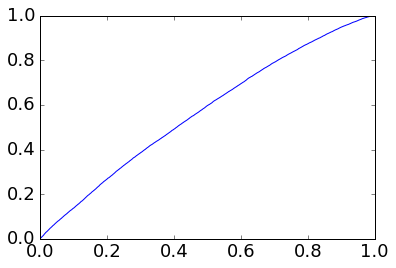

In [45]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, v_probs)
plt.hold(True)
plt.plot(fpr, tpr,Label='Hello')
thresholds
skm.recall_score(y_test, lr.predict(X_test))
pd.crosstab(y_test, lr.predict(X_test))

In [46]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight='auto', max_features=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [47]:
rfc.score(X_test,y_test)

0.79163069285560117

In [48]:
predict2=rfc.predict(X_test)

In [49]:
skm.recall_score(y_test,rfc.predict(X_test))

0.041155555555555556

In [50]:
def plot_importance(clf, X, max_features = 18):
    '''Plot feature importance'''
    feature_importance=clf.feature_importances_
    feature_importance=100.0*(feature_importance/feature_importance.max())
    sorted_idx=np.argsort(feature_importance)
    pos=np.arange(sorted_idx.shape[0])+.5
    
    pos=pos[-max_features:]
    feature_importance=(feature_importance[sorted_idx])[-max_features:]
    features_names=(X.columns[sorted_idx])[-max_features:]
    mycolors='rgb'
    plt.barh(pos, feature_importance, align='center',color=mycolors)
    plt.yticks(pos,features_names)
    plt.xlabel('Relative Importnace')
    plt.title('Variable Importnace')
    
    

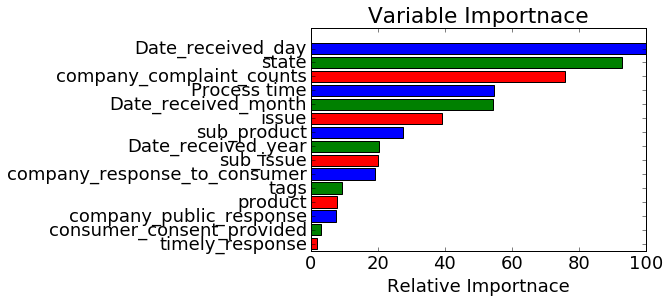

In [51]:
plot_importance(rfc, df_model, max_features=18)

In [52]:
from string import punctuation, ascii_letters
def process_text(text):
    '''
    text:string
    OUTPUT:int, int,int, float(length, word count, uppercase_count_rate, punctuation_rate)
    '''
    length=len(text)
    word_count=0
    last_char=False
    for c in text:
        if c in ascii_letters:
            if last_char==False:
                word_count+=1
                last_char=True
            else:
                last_char=False
                
    punct_count=0
    uppercase_count=0
    for c in text:
        if c in punctuation:
            punct_count+=1
        if c.isupper():
            uppercase_count+=1
    punctuation_rate=punct_count/float(length+1)
    uppercase_count_rate=uppercase_out/float(length+1)
    return length, word_count,uppercase_count_rate,punctuation_rate


In [53]:
def process_text_column(df,fieldname):
    lenght_list=[]
    word_count_list=[]
    punctuation_rate_list=[]
    uppercase_count_rate_list=[]
    for row_ix in df.index:
        length,word_count,uppercase_count_rate,punctuation_rate=process_text_field(df[fieldname][row_ix])
        length_list.append(length)
        word_count_list.append(word_count)
        uppercase_count_rate_list.append(uppercase_count_rate)
        punctuation_rate_list.append(punctuation_rate)
    return length_list, word_count_list,uppercase_count_rate_list, punctuation_rate_list

In [54]:
stemmer=SnowballStemmer("english")

def stem_tokens(takens,stemmer):
    stemmed=[]
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [55]:
def tokenize(text):
    tokens=word_tokenize(text)
    stems=stem_tokens(tokens,stemmer)
    return stems

In [56]:
df=df[df['consumer_complaint_narrative']!='None or Not Provided']

In [57]:
char_remove=['XX','XXX','XXXX']
df['consumer_complaint_narrative']=df['consumer_complaint_narrative'].apply(lambda x:x.translate(None,''.join(char_remove)))

In [58]:
X_word=df['consumer_complaint_narrative'].values
y=df['consumer_disputed?']

In [59]:
X_word.shape

(66806,)

In [84]:
df['consumer_disputed?'].value_counts()

False    51229
True     15577
Name: consumer_disputed?, dtype: int64

In [60]:
X_train_word, X_test_word,y_train,y_test=train_test_split(X_word,y,test_size=0.20,random_state=60)
vectorizer=TfidfVectorizer(stop_words='english',lowercase=False,min_df=0.001,max_df=0.2)

In [61]:
word_matrix_train=vectorizer.fit_transform(X_train_word)
word_matrix_test=vectorizer.transform(X_test_word)
word_matrix=vectorizer.transform(X_word)

In [62]:
word_matrix.shape

(66806, 5093)

In [63]:
model_new=MultinomialNB()
model_new.fit(word_matrix_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
model_new.score(word_matrix_test,y_test)
skm.roc_auc_score(y_test,model_new.predict_proba(word_matrix_test)[:,1])

0.61928647181242658

In [65]:
rf= RandomForestClassifier(n_estimators=500,n_jobs=-1,class_weight='auto')
rf.fit(word_matrix_train, y_train)
skm.roc_auc_score(y_test,rf.predict_proba(word_matrix_test)[:,1])

0.66135839297685783

In [66]:
y_test.shape 

(13362,)

In [67]:
v_prob=rf.predict_proba(word_matrix_test)[:,1]

In [68]:
v_prob.shape

(13362,)

In [69]:
features=np.array(vectorizer.get_feature_names())

In [70]:
table=DataFrame(word_matrix.toarray(),columns=features)

col_0,0.0,0.00124448694016,0.00192332083294,0.002,0.00323571662333,0.004,0.00494541319755,0.006,0.00635057386494,0.008,...,0.95,0.954,0.96,0.962,0.964,0.964778765811,0.968,0.994,0.996,1.0
consumer_disputed?,,,,,,,,,,,,,,,,,,,,,
False,67,1,1,4,1,6,1,8,1,6,...,0,0,0,0,0,0,0,0,0,0
True,0,0,0,0,1,0,0,1,0,0,...,2,1,2,1,1,1,2,1,2,5


In [71]:
table.head()

,000,10,100,1000,10000,100000,11,110,1100,11000,...,yell,yelled,yelling,yes,yesterday,young,yr,yrs,zero,zip
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.051047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


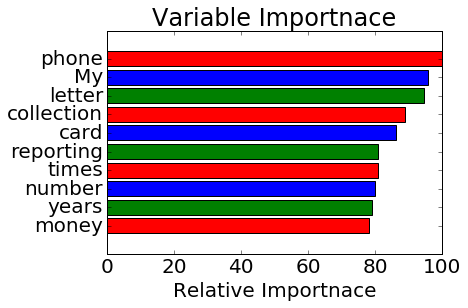

In [72]:
plot_importance(rf,table,max_features=10)
plt.rcParams.update({'font.size':20})

In [73]:
from sklearn.linear_model import SGDClassifier


In [74]:
sdgc=SGDClassifier(loss='log')

In [75]:
sdgc.fit(word_matrix_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [76]:
skm.roc_auc_score(y_test,sdgc.predict_proba(word_matrix_test)[:,1])

0.63555354871168745

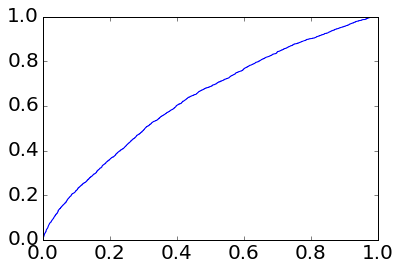

In [85]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, sdgc.predict_proba(word_matrix_test)[:,1])
plt.hold(True)
plt.plot(fpr, tpr,Label='Hello')